# Environment setting

In [1]:
# move to source directory
%cd ../
%pwd
%ls

/home/yh/git/kaggle_ieee-fraud-detection
LICENSE*    data/                   log/          slackauth.json*
Makefile*   deprecated/             model/        startup-jupyter.sh*
README.md*  feature/                notebook/     test/
config/     kaggle-submit-ieee.sh*  run_gbdt.py*  util/


In [2]:
# import major modules
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
sys.stdout.flush()
from util.easydict import EasyDict
import json

In [3]:
version = '0014'
use_small_data = False
dsize = '.small' if use_small_data is True else ''

# import config
r = json.load(open(f'config/result_{version}{dsize}.json'))
r = EasyDict(r)
r

{'features': ['cdeotte'],
 'model': {'type': 'xgb',
  'params': {'booster': 'gbtree',
   'nthread': 4,
   'learning_rate': 0.02,
   'min_split_loss': 0,
   'max_depth': 12,
   'min_child_weight': 1,
   'subsample': 0.8,
   'colsample_bytree': 0.4,
   'tree_method': 'hist',
   'eval_metric': 'auc'}},
 'train': {'n_splits': 5,
  'num_boost_round': 2000,
  'early_stopping_rounds': 100,
  'optimize_num_boost_round': False},
 'runtime': {'version': '0014',
  'use_small_data': False,
  'no_send_message': False,
  'random_seed': 42},
 'scores': {},
 'paths': {'out_train_path': 'data/feature/transformed_0014_train.pkl',
  'out_test_path': 'data/feature/transformed_0014_test.pkl',
  'out_model_dir': 'data/model/model_0014_xgb.pkl',
  'importance_path': 'feature/importance/importance_0014.csv',
  'out_sub_path': 'data/submission/submission_0014.csv',
  'main_log_path': 'log/main_0014.log',
  'train_log_path': 'log/train_0014.tsv',
  'result': 'config/result_0014.json'}}

# Read data

In [4]:
log = pd.read_csv(r.paths.train_log_path, delimiter='\t')
print(log.shape)
log.head()

(2000, 4)


,fold,iteration,train_auc,val_auc
0,0,1,0.867742,0.827093
1,0,2,0.887139,0.846643
2,0,3,0.889644,0.851210
3,0,4,0.893215,0.856963
4,0,5,0.897831,0.864102


Text(0, 0.5, 'auc')

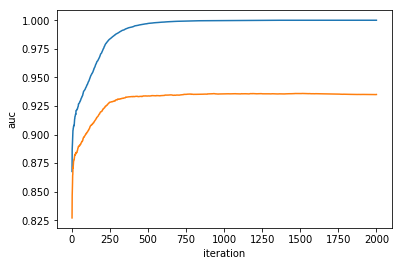

In [5]:
sns.lineplot(x="iteration", y="train_auc", data=log)
sns.lineplot(x="iteration", y="val_auc", data=log)
plt.ylabel('auc')

In [6]:
importance = pd.read_csv(r.paths.importance_path)
importance.columns = ['feature', 'importance']
importance.head()

,feature,importance
0,TransactionAmt,NaN
1,ProductCD,NaN
2,card1,NaN
3,card2,NaN
4,card3,NaN


In [7]:
data = importance.sort_values(by="importance", ascending=False)[0:20]
data.head()

,feature,importance
0,TransactionAmt,NaN
1,ProductCD,NaN
2,card1,NaN
3,card2,NaN
4,card3,NaN


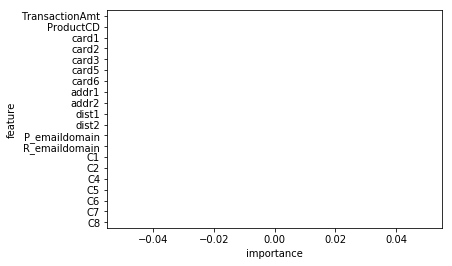

In [8]:
sns.barplot(x="importance", y="feature", data=data);

In [9]:
importance = {'C12_uid_mean': 114, 'C14_uid_mean': 99, 'R_emaildomain': 196, 'V142': 83, 'V54': 86, 'V108': 17, 'V220': 27, 'TransactionAmt_card1_mean': 247, 'D9_card1_addr1_P_emaildomain_std': 344, 'D4_uid_std': 435, 'card1': 1148, 'D9_card1_addr1_P_emaildomain_mean': 461, 'V274': 55, 'V252': 3, 'C7_uid_mean': 126, 'V23': 196, 'TransactionAmt_card1_std': 258, 'D15_uid_std': 266, 'TransactionAmt': 1217, 'dist2': 144, 'card2': 724, 'D15': 421, 'V250': 25, 'V162': 57, 'V283': 79, 'C8_uid_mean': 129, 'id_18': 210, 'addr1': 406, 'C2': 111, 'V285': 67, 'V6': 57, 'C12': 59, 'P_emaildomain': 288, 'card3': 149, 'V185': 7, 'C4': 64, 'V264': 117, 'id_02': 381, 'V156': 118, 'V86': 80, 'TransactionAmt_uid_mean': 183, 'V130': 275, 'id_19': 208, 'C13_uid_mean': 148, 'C10': 65, 'V218': 62, 'V13': 147, 'D15_uid_mean': 281, 'D4': 296, 'V209': 6, 'D11_card1_mean': 278, 'V261': 33, 'card1_addr1': 347, 'card6': 161, 'ProductCD': 209, 'M5_uid_mean': 67, 'TransactionAmt_card1_addr1_P_emaildomain_mean': 135, 'D10': 344, 'M2_uid_mean': 183, 'V138': 17, 'D11_card1_addr1_P_emaildomain_std': 276, 'card1_addr1_P_emaildomain': 329, 'C4_uid_mean': 92, 'V307': 131, 'TransactionAmt_card1_addr1_std': 232, 'V310': 141, 'D9_card1_addr1_mean': 417, 'card1_addr1_FE': 178, 'V289': 7, 'D11_card1_addr1_std': 122, 'V188': 9, 'V44': 70, 'D10_uid_mean': 230, 'V127': 227, 'C7': 14, 'V139': 69, 'V294': 76, 'D2': 135, 'V17': 66, 'C13': 176, 'C8': 35, 'V198': 50, 'V59': 13, 'V215': 19, 'uid_V320_ct': 91, 'id_20': 119, 'id_05': 68, 'D9_uid_std': 94, 'V187': 12, 'TransactionAmt_card1_addr1_mean': 230, 'V40': 24, 'P_emaildomain_FE': 68, 'V62': 10, 'uid_V136_ct': 82, 'dist1': 200, 'V147': 41, 'C1': 114, 'V229': 40, 'D11': 342, 'card1_addr1_P_emaildomain_FE': 140, 'C10_uid_mean': 128, 'V176': 36, 'id_13': 95, 'id_01': 164, 'C14': 57, 'TransactionAmt_card1_addr1_P_emaildomain_std': 240, 'V281': 23, 'uid_C13_ct': 54, 'D9_card1_std': 244, 'D1': 103, 'M3': 28, 'V257': 16, 'addr1_FE': 165, 'card5': 354, 'V221': 44, 'id_31': 154, 'card1_FE': 195, 'C2_uid_mean': 138, 'DeviceInfo': 74, 'D9_card1_addr1_std': 258, 'V203': 54, 'V267': 7, 'card2_FE': 130, 'V260': 13, 'V258': 4, 'D3': 104, 'uid_dist1_ct': 10, 'V205': 5, 'V78': 28, 'D4_uid_mean': 182, 'id_03': 25, 'V171': 30, 'uid_cents_ct': 37, 'V253': 5, 'TransactionAmt_uid_std': 184, 'id_06': 152, 'D10_uid_std': 122, 'C1_uid_mean': 88, 'D9_uid_mean': 166, 'id_16': 45, 'M7': 28, 'V228': 16, 'id_15': 24, 'V314': 18, 'V80': 31, 'V160': 22, 'id_04': 26, 'V166': 17, 'id_29': 8, 'V175': 8, 'uid_id_02_ct': 32, 'M4_uid_mean': 68, 'D11_card1_addr1_P_emaildomain_mean': 168, 'V123': 12, 'C14_uid_std': 149, 'cents': 68, 'V26': 22, 'V3': 32, 'V136': 84, 'uid_V309_ct': 66, 'id_17': 5, 'id_09': 28, 'V37': 34, 'M7_uid_mean': 28, 'C9_uid_mean': 35, 'V165': 17, 'V277': 1, 'id_12': 4, 'id_38': 18, 'M9_uid_mean': 41, 'V291': 16, 'M3_uid_mean': 88, 'C9': 24, 'V235': 2, 'V303': 8, 'id_28': 9, 'V309': 23, 'V234': 14, 'V271': 7, 'D5': 229, 'C5_uid_mean': 20, 'DeviceType': 25, 'V56': 39, 'V207': 11, 'C11': 31, 'V320': 50, 'C5': 33, 'M6_uid_mean': 57, 'uid_FE': 60, 'M4': 38, 'V224': 8, 'V70': 8, 'V36': 55, 'V30': 14, 'uid_V127_ct': 64, 'V124': 17, 'V82': 11, 'C6': 76, 'M2': 35, 'V173': 3, 'uid_V314_ct': 36, 'D9_card1_mean': 167, 'V115': 15, 'card3_FE': 36, 'D11_card1_addr1_mean': 123, 'uid_DT_M_ct': 49, 'V4': 7, 'V178': 12, 'C11_uid_mean': 71, 'uid_V307_ct': 34, 'id_10': 7, 'D11_card1_std': 93, 'V117': 1, 'V180': 5, 'addr2': 12, 'V296': 19, 'V20': 19, 'C6_uid_mean': 50, 'V210': 1, 'V1': 3, 'uid_P_emaildomain_ct': 17, 'M9': 18, 'V47': 11, 'V68': 1, 'V284': 17, 'M8_uid_mean': 34, 'V129': 9, 'V67': 15, 'V301': 12, 'V91': 6, 'V48': 21, 'M6': 34, 'V11': 13, 'M1': 10, 'id_37': 17, 'V14': 3, 'V169': 3, 'V76': 11, 'M8': 13, 'outsider15': 2, 'V182': 2, 'id_11': 1, 'V223': 2, 'V226': 2, 'M1_uid_mean': 1, 'V297': 1}

In [22]:
d = importance
df = pd.DataFrame(importance, index=['feature', 'importance']).T

In [23]:
df.head

<bound method NDFrame.head of                feature  importance
C12_uid_mean       114         114
C14_uid_mean        99          99
R_emaildomain      196         196
V142                83          83
V54                 86          86
...                ...         ...
id_11                1           1
V223                 2           2
V226                 2           2
M1_uid_mean          1           1
V297                 1           1

[246 rows x 2 columns]>

In [26]:
df = df.sort_values(by="importance", ascending=False)[0:20]
df.head()

,feature,importance
TransactionAmt,1217,1217
card1,1148,1148
card2,724,724
D9_card1_addr1_P_emaildomain_mean,461,461
D4_uid_std,435,435
